# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [3]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [4]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.square(X.dot(w) - y).mean()
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2 * np.dot(X.T, np.dot(X, w) - y) / y.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [5]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [6]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]
    for i in range(n_iterations):
        w -= lr * loss.calc_grad(X, y, w)
        w_list.append(w.copy())
    w_list = np.array(w_list)
    return w_list

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [7]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [8]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [9]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)
            # levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - y, 2))

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

learning rate = 0.0001
loss = 115.76116928160988


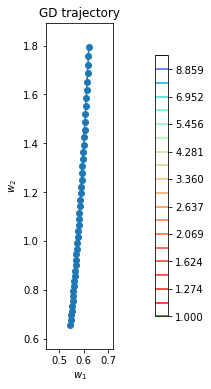

learning rate = 0.00039810717055349735
loss = 10.072593552770542


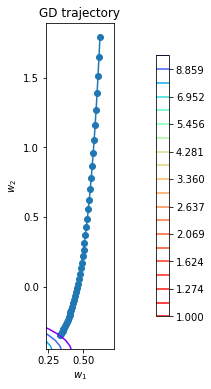

learning rate = 0.001584893192461114
loss = 2.43728320358897


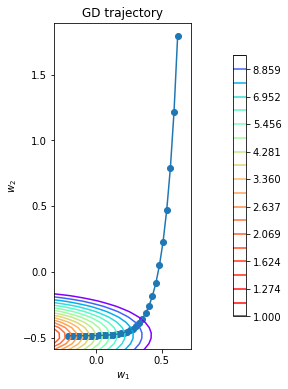

learning rate = 0.00630957344480193
loss = 0.8690756936614075


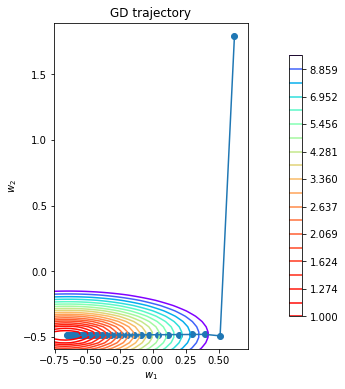

learning rate = 0.025118864315095794
loss = 4.802347391517379e+43


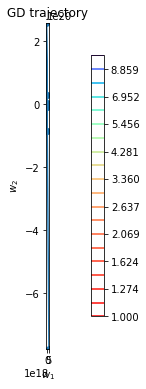

learning rate = 0.1
loss = 3.953433947960336e+103


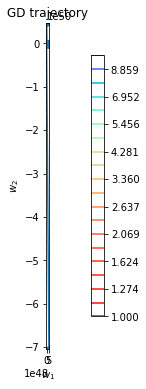

best lr is: 0.00630957344480193


In [10]:
lr_list = np.geomspace(0.0001, 0.1, num=6)
min_loss = float("inf")
best_lr = None
for lr in lr_list:
    print('learning rate =', lr)
    w_list = gradient_descent(w_init, X, y, loss, lr, num_steps)
    cur_loss = loss.calc_loss(X, y, w_list[-1])
    print('loss =', cur_loss)
    if min_loss > cur_loss:
        min_loss = cur_loss
        best_lr = lr
    plot_gd(w_list, X, y, loss)
print('best lr is:', best_lr)

если lr слишком маленький, то градинетный спуск просто не дойдет до минимума и зависнет на пол пути. Тут можно пожертвовать временем и сделать ОООЧЕНЬ много шагов (num_steps), тогда, может быть, градиентный спуск дойдет до минимума. если lr слишком большой, то он попросту будет перешагивать через минимум и никогда в него не попадет, тут уже не поможет увеличение количества шагов. однако если lr попадает в золотую серединку, то градиентный спук успешно доходит до минимума и остается в нем даже при сравнительно небольшом количестве шагов. Лучшим был $lr = 0.00630957344480193$

вероятнее всего графики плющит, потому что точки раскиданы на бесконечности
если задать большой шаг, то как раз получаются вытянутые графики

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [11]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]
    batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
    batch = X[batch_indices]
    batch_y = y[batch_indices]

    for i in range(n_iterations):
        w -= lr * loss.calc_grad(batch, batch_y, w)
        w_list.append(w.copy())

    w_list = np.array(w_list)
    return w_list

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

learning rate = 0.0001
batch size = 1
loss = 352.27402062342384


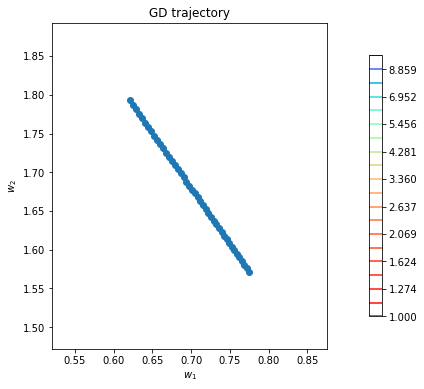

learning rate = 0.0001
batch size = 75
loss = 112.0850123316328


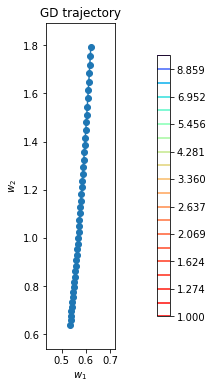

learning rate = 0.0001
batch size = 150
loss = 125.23525417320411


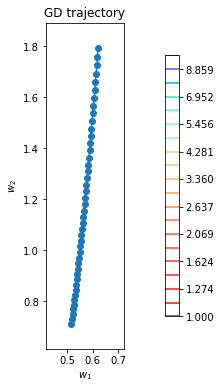

learning rate = 0.0001
batch size = 225
loss = 114.85206629434988


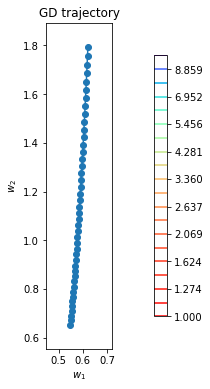

learning rate = 0.0001
batch size = 300
loss = 115.76116928160987


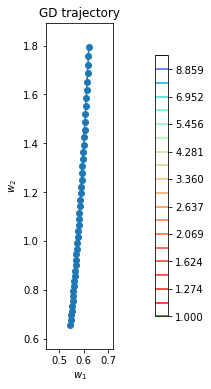

learning rate = 0.0005623413251903491
batch size = 1
loss = 87.77037411212275


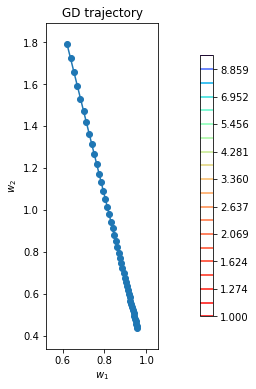

learning rate = 0.0005623413251903491
batch size = 75
loss = 5.491331484034475


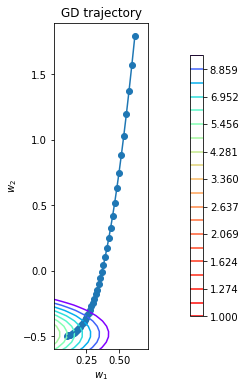

learning rate = 0.0005623413251903491
batch size = 150
loss = 7.031512604273445


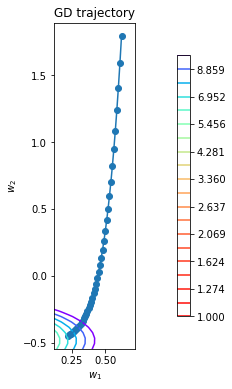

learning rate = 0.0005623413251903491
batch size = 225
loss = 6.970075175789338


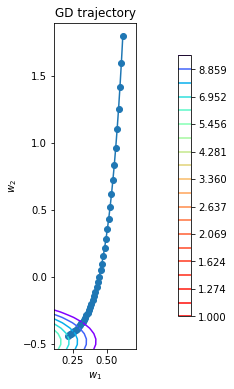

learning rate = 0.0005623413251903491
batch size = 300
loss = 7.211751448437835


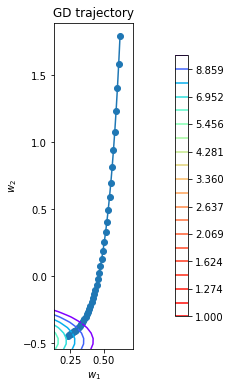

learning rate = 0.0031622776601683794
batch size = 1
loss = 4.82356155841822


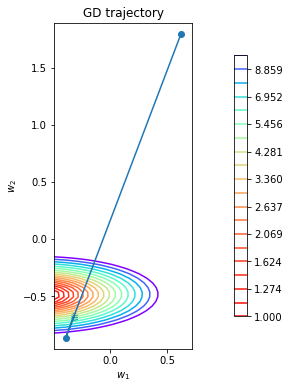

learning rate = 0.0031622776601683794
batch size = 75
loss = 1.088914187186362


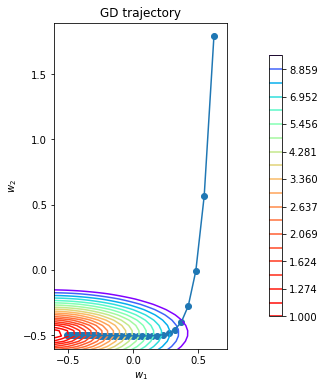

learning rate = 0.0031622776601683794
batch size = 150
loss = 1.0412914431672695


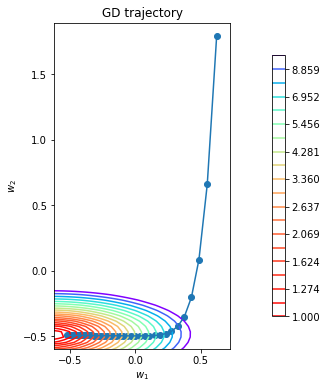

learning rate = 0.0031622776601683794
batch size = 225
loss = 1.0392239631196822


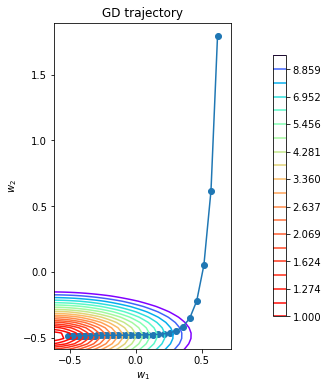

learning rate = 0.0031622776601683794
batch size = 300
loss = 1.0469359286160778


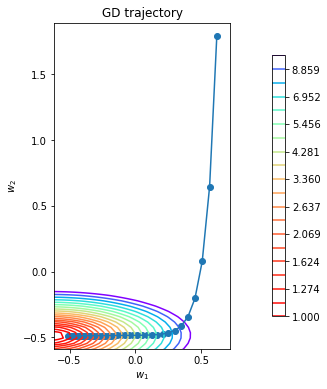

learning rate = 0.01778279410038923
batch size = 1
loss = 3.581368303472902e+31


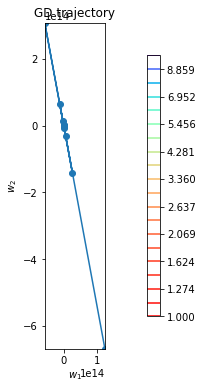

learning rate = 0.01778279410038923
batch size = 75
loss = 1.8501671359428248e+20


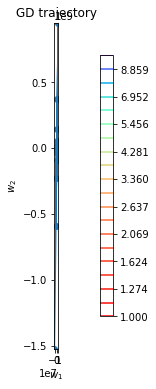

learning rate = 0.01778279410038923
batch size = 150
loss = 7.846199850110843e+24


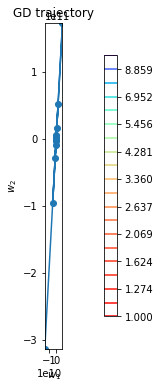

learning rate = 0.01778279410038923
batch size = 225
loss = 8.584880495931578e+27


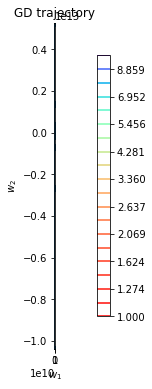

learning rate = 0.01778279410038923
batch size = 300
loss = 1.82684175065909e+25


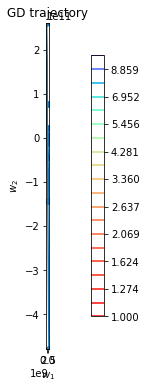

learning rate = 0.1
batch size = 1
loss = 2.1879728819390316e+139


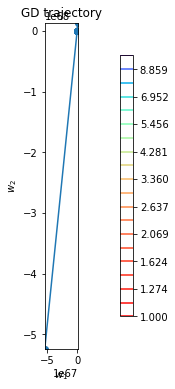

learning rate = 0.1
batch size = 75
loss = 2.8384979362190216e+101


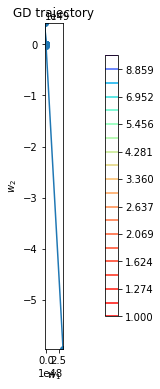

learning rate = 0.1
batch size = 150
loss = 4.759404770021008e+103


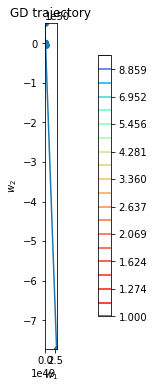

learning rate = 0.1
batch size = 225
loss = 2.447037623478402e+103


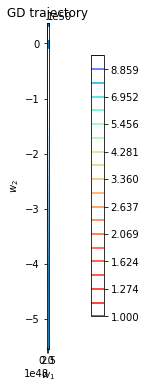

learning rate = 0.1
batch size = 300
loss = 3.953433947960328e+103


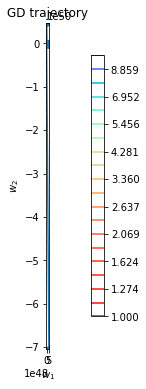

best lr: 0.0031622776601683794
best batch size: 225


In [12]:
lr_list = np.geomspace(0.0001, 0.1, num=5)
batch_list = np.linspace(1, 300, num=5, dtype=int)
min_loss = float('inf')
best_lr_bh = None

for lr in lr_list:
    for bh in batch_list:
        print('learning rate =', lr)
        print('batch size =', bh)
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, bh, num_steps)
        cur_loss = loss.calc_loss(X, y, w_list[-1])
        print('loss =', cur_loss)
        if min_loss > cur_loss:
            min_loss = cur_loss
            best_lr_bh = (lr, bh)
        plot_gd(w_list, X, y, loss)
print(f'best lr: {best_lr_bh[0]}\nbest batch size: {best_lr_bh[1]}')

Ситуация с lr аналогичная обычному градиентному спуску, если слишком большая - перешагнем через минимум, если слишком маленькие, можем не дойти. Поэтому снова лучшим вариантом оказался вариант по середине $lr = 0.0031622776601683794$. С батчами ситуация уже интереснее, для начала отметим вполне логичную вещь: обучение будет идти быстрее, ведь мы не проходимся по всем обьектам выборки. SGD может устраивать расколбас, что он в принципе и делает, однако минимум находит. С размером батча ситуация аналогичная lr - оптимальный вариант по серединке. Если batch size слишком маленький - ловим переобучение, если batch size слишком большой - смысла в SGD как такого не будет, потому что мы повторили GD. Лучший $batch size = 75$ (в данном случае).

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [13]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    s_0 = 1
    w = w_init.copy()
    w_list = [w.copy()]
    batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
    batch = X[batch_indices]
    batch_y = y[batch_indices]

    for i in range(n_iterations):
        step_size = lr * np.power(s_0 / (s_0 + i), p)
        w -= step_size * loss.calc_grad(batch, batch_y, w)
        w_list.append(w.copy())

    w_list = np.array(w_list)
    return w_list

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p = 0.1
loss = 0.8924154268392341


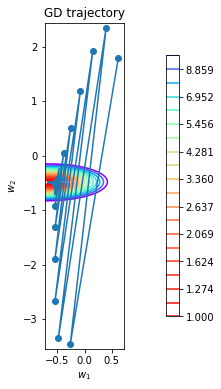

p = 0.28
loss = 1.057554123719331


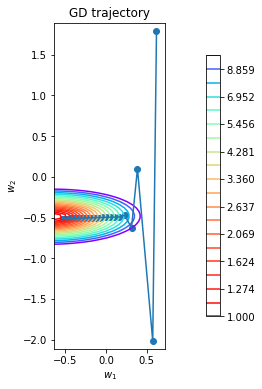

p = 0.45999999999999996
loss = 2.1015057688701435


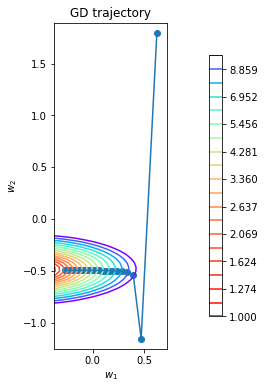

p = 0.64
loss = 2.1241308667968926


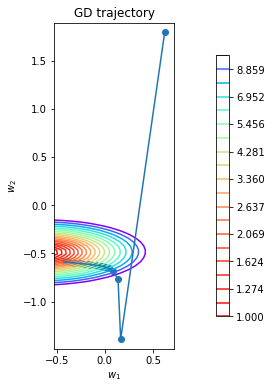

p = 0.82
loss = 2.3382855250197228


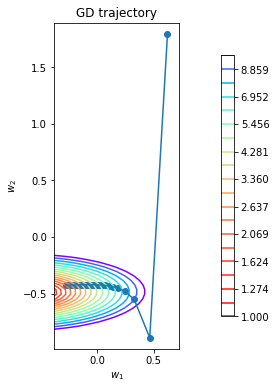

p = 1.0
loss = 4.624615903378033


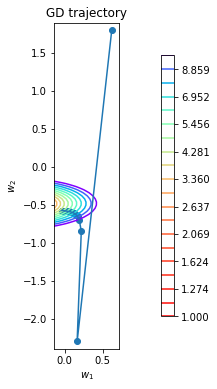

best p: 1.0


In [14]:
p_list = np.linspace(0.1, 1, num=6)
bh = 10
lr = 0.01
min_loss = float('inf')
best_p = None

for p in p_list:
    print('p =', p)
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, bh, p, num_steps)
    cur_loss = loss.calc_loss(X, y, w_list[-1])
    print('loss =', cur_loss)
    if min_loss > cur_loss:
        min_loss = cur_loss
        best_p = p
    plot_gd(w_list, X, y, loss)
print('best p:', p)

График вот такой функции:
$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$
Это гипербола, взятая на положительных значениях X, потому что номер шага больше или равен 0. Тогда отталкиваясь от этого можно интерпретировать p, как величину прижатия графика к оси.
![jupyter](./Screenshot_1.png)
![jupyter](./Screenshot_2.png)
Иначе говоря p это насколько сильно наша функция будет становиться меньше и больше. Тут вполне логично, что порой это очень хорошо, ведь за пару огромных шагов в начале мы подойдем к области с минимумом, а потом дойдем в сам минимум очень малыми шагами. Но опять же, я вижу это как палу о двух концах - мы можем перешагнуть минимум и в результате до него не дойти.
Лучшим вариантом при данных параметрах оказался $p=1$

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

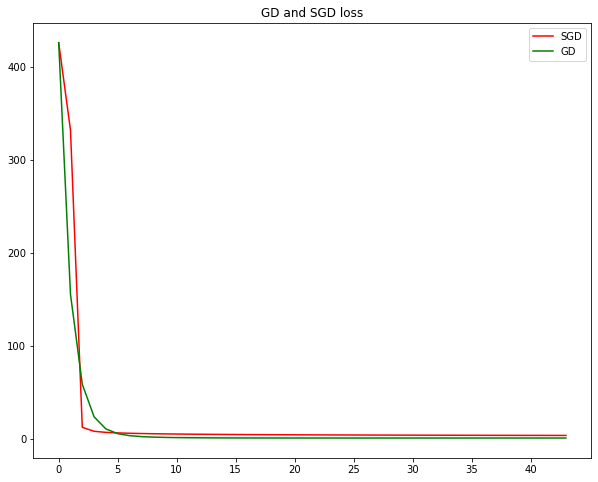

In [15]:
# думаю, никого не обижу, если в качестве
# параметров возьму данные из предыдущего задания
bh = 10
lr = 0.01
p = 1
w_list_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr, bh, p, num_steps)
w_list_gd = gradient_descent(w_init, X, y, loss, lr, num_steps)
loss_sgd = [loss.calc_loss(X, y, weights) for weights in w_list_sgd]
loss_gd = [loss.calc_loss(X, y, weights) for weights in w_list_gd]
nums = np.arange(0, num_steps + 1, 1)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8)) 
plt.plot(nums, loss_sgd, color='r', label='SGD')
plt.plot(nums, loss_gd, color='g', label='GD')
plt.title("GD and SGD loss")
plt.xticks(np.arange(0, 43, step=5))
plt.legend()
plt.show()

На первый взгляд, GD сработал лучше, ведь его loss меньше, однако если чуть чуть подумать головой мы заметим, что sgd нашел минимум примерно за 5 шагов по 10 обьектов итого обработав 50 обьектов, в то время как gd, который справился за те же 5 шагов обработал 300 обьектов на каждом итого 1500 обьектов.

Тут безусловный победитель в аспекте производительности - это SGD, он сделал в 30 раз меньше вычислений для получения аналогичного результата.

Однако если у нас нет проблем с вычислительными мощностями, или выборка не столь огромная, почему бы не выбрать GD, ведь он дает лучший результат (loss по итогу поменьше).

Вывод: SGD сходится быстрее, чем GD. Но GD сходится лучше, чем SGD.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [16]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.01) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.w = np.random.randn(X.shape[1])
        w_list = gradient_descent(self.w, X, y, self.loss, self.lr, 3000)
        self.w = w_list[-1]
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        result = np.dot(X, self.w)
        return result

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [17]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [18]:
import pandas as pd
# https://archive.ics.uci.edu/ml/datasets/Automobile
X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None,
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [19]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)
X_raw = X_raw.drop(columns=['index'])

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [20]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size = 0.3)

In [21]:
from sklearn.impute import SimpleImputer

cat_features_mask = (X_raw.dtypes == "object").values

X_real_train = X_train[X_train.columns[~cat_features_mask]]
X_real_test = X_test[X_test.columns[~cat_features_mask]]

mis_replacer = SimpleImputer(strategy="mean")
mis_replacer.fit(X_real_train)

X_no_mis_real_train = pd.DataFrame(data=mis_replacer.transform(X_real_train), columns=X_real_train.columns)
X_no_mis_real_test = pd.DataFrame(data=mis_replacer.transform(X_real_test), columns=X_real_test.columns)

In [22]:
X_cat_train = X_train[X_train.columns[cat_features_mask]].fillna("")
X_cat_test = X_test[X_test.columns[cat_features_mask]].fillna("")

X_cat_train.reset_index(drop=True, inplace=True)
X_cat_test.reset_index(drop=True, inplace=True)

X_no_mis_train = pd.concat([X_no_mis_real_train, X_cat_train], axis=1)
X_no_mis_test = pd.concat([X_no_mis_real_test, X_cat_test], axis=1)

num = len(X_no_mis_train)

dataset = pd.concat(objs=[X_no_mis_train, X_no_mis_test], axis=0)
dataset_preprocessed = pd.get_dummies(dataset)
X_dum_train = dataset_preprocessed[:num]
X_dum_test = dataset_preprocessed[num:]

X_dum_train.head()

# https://stackoverflow.com/questions/32801806/pandas-concat-ignore-index-doesnt-work

,0,1,9,10,11,12,13,16,18,19,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0.0,77.0,95.7,169.7,63.6,59.1,2280.0,92.0,3.05,3.03,...,0,0,0,1,0,0,0,0,0,0
1,0.0,161.0,108.0,186.7,68.3,56.0,3130.0,134.0,3.61,3.21,...,0,0,0,0,0,0,0,1,0,0
2,2.0,94.0,97.3,171.7,65.5,55.7,2300.0,109.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
3,1.0,158.0,105.8,192.7,71.4,55.9,3086.0,131.0,3.13,3.40,...,0,0,0,0,0,0,0,1,0,0
4,0.0,91.0,95.7,166.3,64.4,53.0,2081.0,98.0,3.19,3.03,...,0,0,0,1,0,0,0,0,0,0


In [23]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler
scal = StandardScaler()
X_train_transformed = scal.fit_transform(X_dum_train)
X_test_transformed = scal.transform(X_dum_test)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [24]:
linear_regression.fit(X_train_transformed, y_train)
preds_train = linear_regression.predict(X_train_transformed)
preds_test = linear_regression.predict(X_test_transformed)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [25]:
from sklearn.metrics import mean_squared_error

print('train mse', mean_squared_error(preds_train, y_train))
print('test mse', mean_squared_error(preds_test, y_test))

train mse 1665937.886984834
test mse 6098112.605890274


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [26]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return np.square(X.dot(w) - y).mean() + self.coef * np.dot(w[:-1], w[:-1])
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w_t = w.copy()
        w_t[-1] = 0
        return 2 * np.dot(X.T, np.dot(X, w) - y) / X.shape[0] + self.coef * 2 * w_t

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [27]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [28]:
cf_list = np.linspace(0, 0.1, num=12)
mn = float('inf')
best_cf = None
for cf in cf_list:
    linear_regression = LinearRegression(MSEL2Loss(cf))
    linear_regression.fit(X_train_transformed, y_train)
    preds_test = linear_regression.predict(X_test_transformed)
    if mean_squared_error(preds_test, y_test) < mn:
        mn = mean_squared_error(preds_test, y_test)
        best = cf
print('best cf is', best)
linear_regression = LinearRegression(MSEL2Loss(best))
linear_regression.fit(X_train_transformed, y_train)
preds_train = linear_regression.predict(X_train_transformed)
preds_test = linear_regression.predict(X_test_transformed)
print('train mse', mean_squared_error(preds_train, y_train))
print('test mse', mean_squared_error(preds_test, y_test))

best cf is 0.09090909090909093
train mse 2303938.0115683638
test mse 4860182.600695929


Сравним полученные ошибки:

linear regression MSE | l2 reg linear regression MSE
:------: | :------:
train mse 1665937.886984834 | train mse 2303938.0115683638   
test mse 6098112.605890274 | test mse 4860182.600695929

Ошибка на train выборке увеличилась, а на test выборке уменьшилась, из чего следует что переобучение все же имело место. Качество модели улучшилось после применения регуляризации, а оптимальным для этого коэффициентом стал $coef = 0.09090909090909093$. Качество прямо солидно так улучшилось

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [29]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float = 1) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = X.dot(w) - y
        sqared_part = np.square(z) / 2
        abs_part = np.abs(z) - self.eps / 2
        
        total_vec = np.zeros_like(y)
        total_vec[np.abs(z) < self.eps] = sqared_part[np.abs(z) < self.eps]
        total_vec[~(np.abs(z) < self.eps)] = abs_part[~(np.abs(z) < self.eps)]
        return np.mean(total_vec)
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        
        z = X.dot(w) - y
        lin_part = z
        sign_part = self.eps * np.sign(z)
        
        total_vec = np.zeros_like(y)
        total_vec[np.abs(z) < self.eps] = lin_part[np.abs(z) < self.eps]
        total_vec[~(np.abs(z) < self.eps)] = sign_part[~(np.abs(z) < self.eps)]
        return np.dot(X.T, total_vec) / X.shape[0]
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [30]:
linear_regression = LinearRegression(HuberLoss())
linear_regression.fit(X_train_transformed, y_train)
preds_train = linear_regression.predict(X_train_transformed)
preds_test = linear_regression.predict(X_test_transformed)
print('train mse', mean_squared_error(preds_train, y_train))
print('test mse', mean_squared_error(preds_test, y_test))

train mse 269268473.79507375
test mse 161366876.36717218


In [31]:
epsilon_list = np.linspace(3000, 6000, num=30)
min_loss = float('inf')
best_eps = None
for epsilon in epsilon_list:
    linear_regression = LinearRegression(HuberLoss(1500))
    linear_regression.fit(X_train_transformed, y_train)
    preds_train = linear_regression.predict(X_train_transformed)
    preds_test = linear_regression.predict(X_test_transformed)
    test_mse = mean_squared_error(preds_test, y_test)
    if min_loss > test_mse:
        min_loss = test_mse
        best_eps = epsilon

linear_regression = LinearRegression(HuberLoss(best_eps))
linear_regression.fit(X_train_transformed, y_train)
preds_train = linear_regression.predict(X_train_transformed)
preds_test = linear_regression.predict(X_test_transformed)
print(f'best epsilon is {best_eps}')
print('train mse', mean_squared_error(preds_train, y_train))
print('test mse', mean_squared_error(preds_test, y_test))

best epsilon is 5482.758620689656
train mse 1878923.9058223404
test mse 5210684.491531599


Хубер отработал на тесте между MSE и MSE с регуляризацией, лосс на трейне оказался также по серединке, выходит хубер это круто, но было бы неплохо подобрать коэффициент побольше, в моем случае лучший: $epsilon = 5482.758620689656$

но регуляризация еще круче...

linear regression MSE | l2 reg linear regression MSE | linear regression Huber
:------: | :------: | :------:
train mse 1665937.886984834 | train mse 2303938.0115683638 | train mse 1878923.9058223404
test mse 6098112.605890274 | test mse 4860182.600695929 | test mse 5210684.491531599

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

и все его вариации
![jupyter](./414a116ea11e70ab2b918edc4dfd45b3.jpg)

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [32]:
import random


def anneal_simulation(w_init, X, y, loss, t_max=1e+6, t_min=5): 
    def make_trans(d, t):
        prob = np.exp(-delta/t)
        val = random.uniform(0, 1)
        if val <= prob:
            return True
        return False
    
    
    t = t_max
    old_w = w_init.copy()
    w_list = [old_w.copy()]
    num = 1
    while t > t_min:
        new_w = old_w + np.random.standard_t(2, size=old_w.shape)
        delta = loss.calc_loss(X, y, new_w) - loss.calc_loss(X, y, old_w)
        if delta <= 0:
            old_w = new_w
        else:
            if make_trans(delta, t):
                old_w = new_w
        t = t_max * 0.1 / num
        num += 1
        w_list.append(old_w.copy())
    w_list = np.array(w_list)
    return w_list
        
        

In [33]:
class LinearRegressionAnealDesc:
    def __init__(self, loss: BaseLoss, lr: float = 0.01) -> None:
        self.loss = loss
        self.lr = lr
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.w = np.random.randn(X.shape[1])
        self.w_list_anneal = anneal_simulation(self.w, X, y, self.loss)
        self.w_list_gd = gradient_descent(self.w, X, y, self.loss, self.lr, 3000)
        self.w_ann = self.w_list_anneal[-1]
        self.w_gd = self.w_list_gd[-1]
        self.make_graph(X, y)
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        result_ann = np.dot(X, self.w_ann)
        result_gd = np.dot(X, self.w_gd)
        return {'ann': result_ann, 'gd': result_gd}
    
    def make_graph(self, X, y):
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        loss_ann = np.array([loss.calc_loss(X, y, weights) for weights in self.w_list_anneal])
        loss_gd = np.array([loss.calc_loss(X, y, weights) for weights in self.w_list_gd])
        n = len(loss_ann) - len(loss_gd)
        dums = np.full(n, None)
        loss_gd = np.concatenate([loss_gd, dums])
        nums = np.arange(0, len(loss_ann), 1)
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10,8))
        plt.plot(nums, loss_ann, color='r', label='ANN')
        plt.plot(nums, loss_gd, color='g', label='GD')
        plt.title("GD and ANN loss")
        plt.xlabel('iterations')
        plt.legend()
        plt.show()

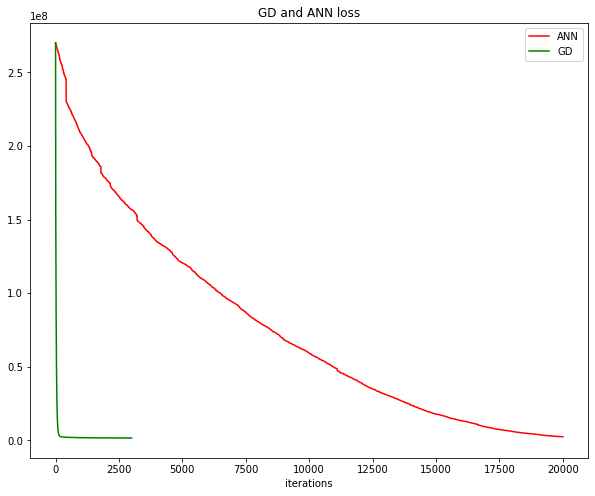

Wall time: 1.62 s


In [34]:
%%time
linear_regression = LinearRegressionAnealDesc(MSELoss())
linear_regression.fit(X_train_transformed, y_train)
preds_train = linear_regression.predict(X_train_transformed)
preds_test = linear_regression.predict(X_test_transformed)

In [35]:
from sklearn.metrics import mean_squared_error

print('ann train mse', mean_squared_error(preds_train['ann'], y_train))
print('ann test mse', mean_squared_error(preds_test['ann'], y_test))
print()
print('gd train mse', mean_squared_error(preds_train['gd'], y_train))
print('gd test mse', mean_squared_error(preds_test['gd'], y_test))

ann train mse 2534729.0358511447
ann test mse 5347675.534700696

gd train mse 1666009.9021992323
gd test mse 6098401.967772654


ну, сказано - сделано. Метод отжига обучается гораздо дольше, а на выходе дает результаты сравнимые с градиентным спуском, причем градиентному спуску даже не стоит много учиться, ведь он переобучиться. Вывод: штучка прикольная, лосс так забавно опускается, но не очень эффективная.

Я поэкспериментировал с количеством степеней свободы и пришел к тому, что 2 это оптимально - не слишком мало, чтобы не застревать в локальных минимумах, но и не слишком много, чтобы перескакивать их.